<a href="https://colab.research.google.com/github/heoraon/Machine-Leaning/blob/main/Research_KoFinBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


한글 폰트 다운로드



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import os
import sys

# 런타임 재시작
print("런타임을 재시작합니다. 잠시 후 다시 실행하세요.")
os._exit(00)

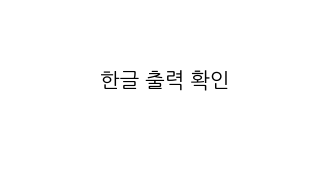

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

# 한글 출력 테스트
plt.figure(figsize=(4, 2))
plt.text(0.5, 0.5, '한글 출력 확인', fontsize=15, ha='center')
plt.axis('off')
plt.show()

데이터셋 불러오기

In [ ]:
# Google Drive 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Datasets/NewsResult_19900101-20250512.xlsx'
df = pd.read_excel(file_path)

# 데이터 확인
df.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.501201e+06,20250511,경북매일신문,최상진,"달성군, 아동돌봄시설에 디지털 학습 지원 교육 격차 해소 앞장",지역>경기,지역>대전,지역>전북,NaN,NaN,NaN,NaN,"대구,달성군","지역아동센터,달성군","달성군,아동돌봄시설,지원,디지털,학습,교육,격차,해소,앞장,대구,달성군,이달,지역아...","아동들,달성군,최재훈,ai,앞장,돌봄,자기주도적,지역아동센터,5500만,온라인,종사...",대구 달성군이 이달부터 지역아동센터와 다함께돌봄센터를 이용하는 아동들을 대상으로 ‘...,NaN,NaN
1,1.500501e+06,20250511,대구일보,이혜림 기자,"(포커스) 꼿꼿 문수! '단일화 파동', 당원이 김문수 키웠다",정치>선거,정치>국회_정당,NaN,사고>교통사고>철도사고,사회>사회문제>노예,NaN,"김 후보,김,박근혜,윤,진영,김문수,조경태,우재준,나경원,윤석열,후보,한덕수,김형동...","영천,부울경,노동운동가,호남선,부천,동해,경기도,수도권,대구경북,우호,경북,경북고·...","구글,수성,민주당,소련,신한국당,유일,더불어민주당,고용노동부,비대위,국회,후보,선관...","포커스,문수,단일,파동,당원,김문수,단일,파동,8일,김문수,승리,국민,당원들,선택,...","김문수,검색량,단일화,당원,gtx,지도부,한덕수,문수,여론조사,구글,ai",‘단일화 파동’이 8일만에 ‘김문수 승리’로 막을 내렸다. 국민의힘 전 당원들의 선...,https://www.idaegu.com/news/articleView.html?i...,NaN
2,4.100058e+06,20250509,노컷뉴스,김종현\n충북CBS 김종현 기자,"김병우 전 충북교육감 ""다음 선거 출마 안해, 후배 성장 도울 것""",사회>교육_시험,정치>선거,NaN,범죄>범죄일반>폭행,사회>사회문제>빈곤,NaN,"이은영,윤석열,김종현,문형배,김병우","충북교육감,충북,미국,상주,서울,유럽,에스토니아,충주,충청북도교육감,재선,종로구,대...","진로,프랑스,넷플릭스,늘봄학교,정부,OECD,시·도교육청,불공정,중앙정부,세울,IB...","김병우,충북교육감,충북,교육감,선거,출마,후배,성장,초대석,12.3,비상,계엄,폭력...","김종현,김병우,교육감,사교육,충북,윤석열,청취자,사교육비,시사직감,학부모,ib,대한...","핵심요약 ■ 방송: 충북CBS 라디오 <시사직감> 청주 FM 91.5MHz, 충주 ...",NaN,NaN
3,4.101008e+06,20250509,이데일리,김경은,"비상교육, AI 디지털교과서에 국내 최초 ‘심리 정서 맞춤 코칭’ 탑재",사회>교육_시험,IT_과학>과학,IT_과학>콘텐츠,NaN,NaN,NaN,NaN,한국심리학회,"비상교육,인지심리연구소,서강대","비상교육,AI,디지털,교과서,심리,정서,맞춤,코칭,탑재,공부,감정,맞춤,학습,솔루션...","비상교육,코칭,ai,학습자,aidt,서강대,관계자,한국심리학회,심리학,디지털교과서,...",[이데일리 김경은 기자] 비상교육(100220)은 독자 개발한 심리 코칭 프로그램을...,http://www.edaily.co.kr/news/newspath.asp?news...,NaN
4,7.100501e+06,20250509,전자신문,정하정,"[에듀플러스]비상교육, AI 디지털교과서에 '심리 정서 맞춤 코칭' 탑재",사회>교육_시험,IT_과학>인터넷_SNS,IT_과학>콘텐츠,NaN,NaN,NaN,NaN,NaN,"비상교육,인지심리연구소,서강대","비상교육,AI,디지털,교과서,심리,정서,맞춤,코칭,탑재,비상교육,독자,심리,코칭,프...","ai,비상교육,코칭,디지털교과서,서강대,학습자,관계자,심리학,교수진,디딤돌,쌍방향,...",비상교육은 독자 개발한 심리 코칭 프로그램을 AI 디지털교과서에 적용해 학습자 정서...,http://www.etnews.com/20250509000036,NaN


데이터셋 정보 확인

In [ ]:
# 엑셀 파일 불러오기 (모든 시트 중 첫 번째 시트 기준)
df = pd.read_excel(file_path)

# 데이터프레임 구조 확인
df.info(), df.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145 entries, 0 to 8144
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   뉴스 식별자             8145 non-null   float64
 1   일자                 8145 non-null   int64  
 2   언론사                8145 non-null   object 
 3   기고자                7723 non-null   object 
 4   제목                 8145 non-null   object 
 5   통합 분류1             8145 non-null   object 
 6   통합 분류2             6324 non-null   object 
 7   통합 분류3             4234 non-null   object 
 8   사건/사고 분류1          561 non-null    object 
 9   사건/사고 분류2          142 non-null    object 
 10  사건/사고 분류3          66 non-null     object 
 11  인물                 6173 non-null   object 
 12  위치                 6551 non-null   object 
 13  기관                 8123 non-null   object 
 14  키워드                8145 non-null   object 
 15  특성추출(가중치순 상위 50개)  8145 non-null   object 
 16  본문                 8145 

(None,
          뉴스 식별자        일자     언론사                기고자  \
 0  1.501201e+06  20250511  경북매일신문                최상진   
 1  1.500501e+06  20250511    대구일보             이혜림 기자   
 2  4.100058e+06  20250509    노컷뉴스  김종현\n충북CBS 김종현 기자   
 3  4.101008e+06  20250509    이데일리                김경은   
 4  7.100501e+06  20250509    전자신문                정하정   
 
                                          제목    통합 분류1          통합 분류2  \
 0        달성군, 아동돌봄시설에 디지털 학습 지원 교육 격차 해소 앞장     지역>경기           지역>대전   
 1        (포커스) 꼿꼿 문수! '단일화 파동', 당원이 김문수 키웠다     정치>선거        정치>국회_정당   
 2     김병우 전 충북교육감 "다음 선거 출마 안해, 후배 성장 도울 것"  사회>교육_시험           정치>선거   
 3   비상교육, AI 디지털교과서에 국내 최초 ‘심리 정서 맞춤 코칭’ 탑재  사회>교육_시험        IT_과학>과학   
 4  [에듀플러스]비상교육, AI 디지털교과서에 '심리 정서 맞춤 코칭' 탑재  사회>교육_시험   IT_과학>인터넷_SNS   
 
        통합 분류3     사건/사고 분류1    사건/사고 분류2 사건/사고 분류3  \
 0       지역>전북           NaN          NaN       NaN   
 1         NaN  사고>교통사고>철도사고   사회>사회문제>노예       NaN   
 2         NaN    범죄>범죄일반>폭행   사회>사회문제

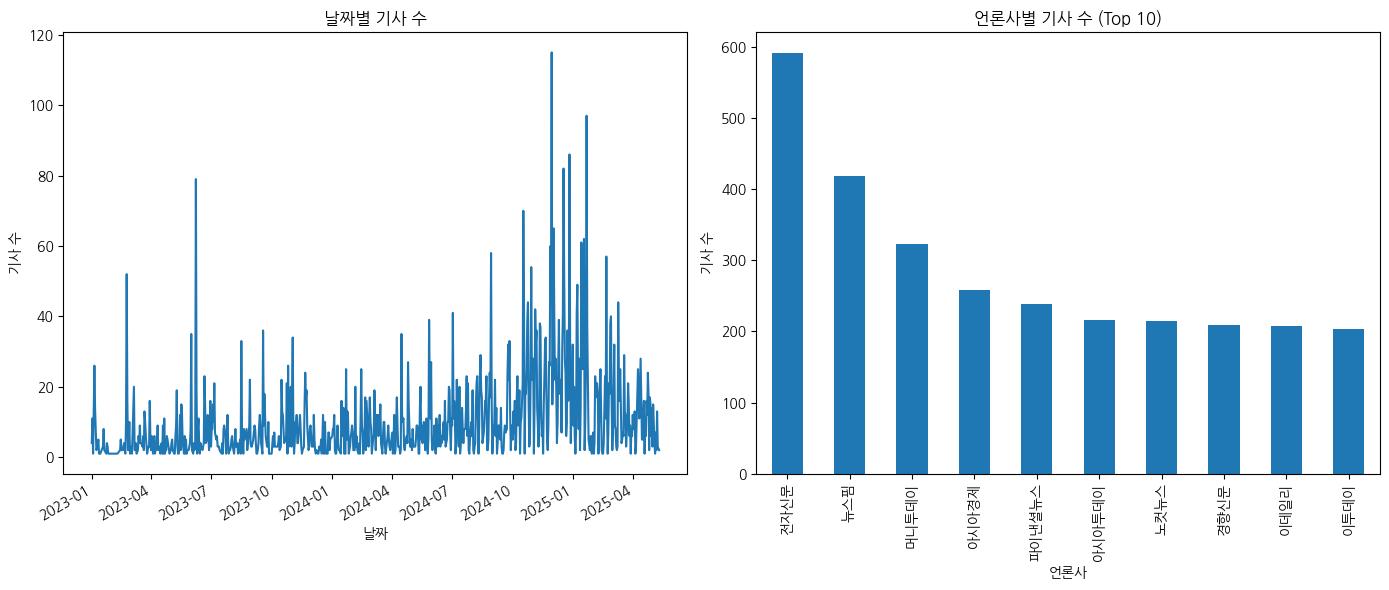

(None, '/content/drive/MyDrive/Datasets/news_data.csv')

In [ ]:
import seaborn as sns

# CSV로 저장
csv_path = "/content/drive/MyDrive/Datasets/news_data.csv"
df.to_csv(csv_path, index=False)

# 일자 컬럼을 datetime으로 변환
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')

# 날짜별 기사 수
daily_counts = df['일자'].value_counts().sort_index()

# 언론사별 기사 수 상위 10개
top_press_counts = df['언론사'].value_counts().head(10)

# 시각화
plt.figure(figsize=(14, 6))

# 1. 날짜별 기사 수
plt.subplot(1, 2, 1)
daily_counts.plot()
plt.title('날짜별 기사 수')
plt.xlabel('날짜')
plt.ylabel('기사 수')

# 2. 언론사별 기사 수 상위 10개
plt.subplot(1, 2, 2)
top_press_counts.plot(kind='bar')
plt.title('언론사별 기사 수 (Top 10)')
plt.xlabel('언론사')
plt.ylabel('기사 수')

plt.tight_layout()
plt.show(), csv_path

전처리

In [ ]:
# AI 디지털 교과서와 무관한 기사 제거

# 키워드 리스트 (띄어쓰기 차이 고려)
keywords = ['AI 디지털교과서', 'AI디지털교과서', 'AI디지털 교과서', 'AI 디지털 교과서', '인공지능 디지털교과서', '인공지능디지털교과서', '인공지능디지털 교과서', '인공지능 디지털 교과서', '디지털교과서', '디지털 교과서', 'AIDT']

# '제목' 또는 '본문'에 키워드가 하나라도 포함되는지 여부 확인
def contains_keywords(text):
    if pd.isna(text):
        return False
    return any(keyword in text for keyword in keywords)

# 필터링 조건
mask = df['제목'].apply(contains_keywords) | df['본문'].apply(contains_keywords) | df['특성추출(가중치순 상위 50개)'].apply(contains_keywords)

# 해당 조건에 맞는 행만 남기고 나머지는 삭제
df_filtered = df[mask].reset_index(drop=True)

# CSV로 저장
csv_path = "/content/drive/MyDrive/Datasets/news_data_filtered.csv"
df_filtered.to_csv(csv_path, index=False)

# 데이터프레임 구조 확인
df_filtered.info(), df_filtered.head(), df_filtered.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   뉴스 식별자             3960 non-null   float64       
 1   일자                 3960 non-null   datetime64[ns]
 2   언론사                3960 non-null   object        
 3   기고자                3766 non-null   object        
 4   제목                 3960 non-null   object        
 5   통합 분류1             3960 non-null   object        
 6   통합 분류2             2970 non-null   object        
 7   통합 분류3             1876 non-null   object        
 8   사건/사고 분류1          131 non-null    object        
 9   사건/사고 분류2          17 non-null     object        
 10  사건/사고 분류3          1 non-null      object        
 11  인물                 2862 non-null   object        
 12  위치                 2899 non-null   object        
 13  기관                 3945 non-null   object        
 14  키워드     

(None,
          뉴스 식별자         일자     언론사     기고자  \
 0  1.501201e+06 2025-05-11  경북매일신문     최상진   
 1  4.101008e+06 2025-05-09    이데일리     김경은   
 2  7.100501e+06 2025-05-09    전자신문     정하정   
 3  1.400201e+06 2025-05-08    대전일보  정인선 기자   
 4  7.100501e+06 2025-05-08    전자신문     최다현   
 
                                                   제목    통합 분류1  \
 0                 달성군, 아동돌봄시설에 디지털 학습 지원 교육 격차 해소 앞장     지역>경기   
 1            비상교육, AI 디지털교과서에 국내 최초 ‘심리 정서 맞춤 코칭’ 탑재  사회>교육_시험   
 2           [에듀플러스]비상교육, AI 디지털교과서에 '심리 정서 맞춤 코칭' 탑재  사회>교육_시험   
 3                      尹 정부 교육정책 진통 여전 대선 공론화는 '미지근'  사회>교육_시험   
 4  [人사이트] 장시준 KERIS AIDT본부장 “AI와 교육의 융합, 학생 잠재력 발...  사회>교육_시험   
 
            통합 분류2      통합 분류3 사건/사고 분류1 사건/사고 분류2 사건/사고 분류3       인물      위치  \
 0           지역>대전       지역>전북       NaN       NaN       NaN      NaN  대구,달성군   
 1        IT_과학>과학   IT_과학>콘텐츠       NaN       NaN       NaN      NaN  한국심리학회   
 2   IT_과학>인터넷_SNS   IT_과학>콘텐츠       NaN       NaN       NaN  

In [ ]:
predict_data = []
for i in df_filtered['제목']:
  predict_data.append(i)

print(len(predict_data))

3960


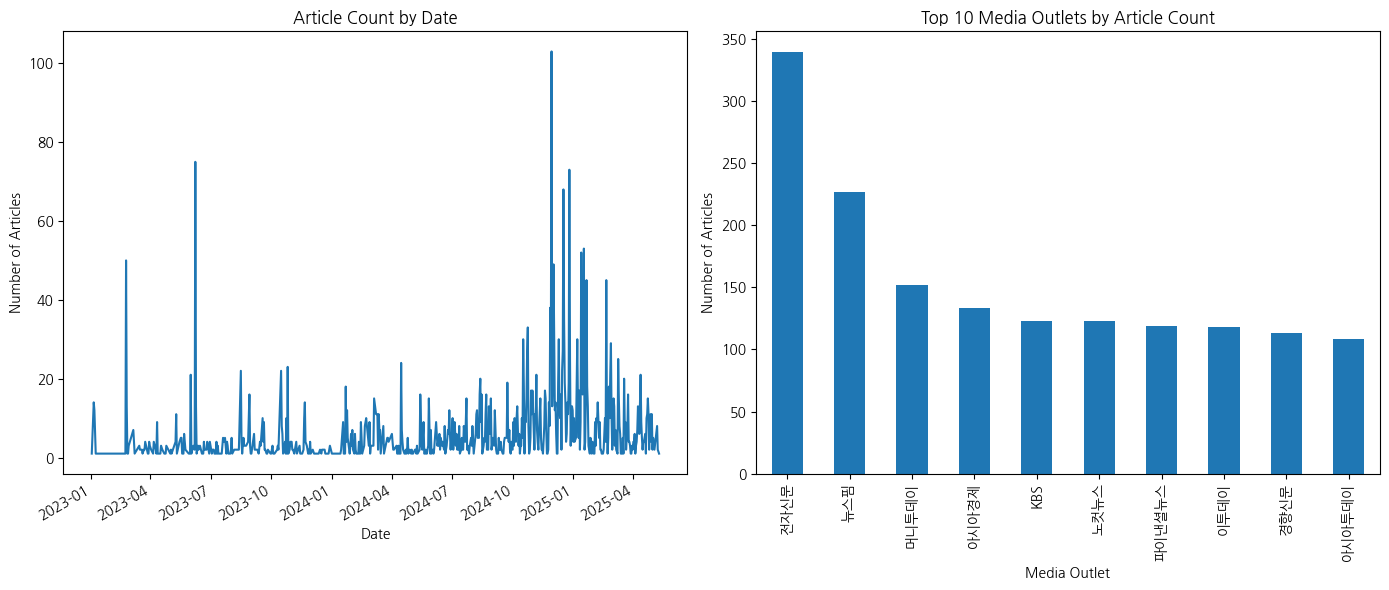

In [ ]:
# Convert date column to datetime
df_filtered['일자'] = pd.to_datetime(df_filtered['일자'], format='%Y%m%d')

# Article counts by date
daily_counts = df_filtered['일자'].value_counts().sort_index()

# Top 10 media outlets by article count
top_press_counts = df_filtered['언론사'].value_counts().head(10)

# Visualization
plt.figure(figsize=(14, 6))

# 1. Article counts by date
plt.subplot(1, 2, 1)
daily_counts.plot()
plt.title('Article Count by Date')
plt.xlabel('Date')
plt.ylabel('Number of Articles')

# 2. Top 10 media outlets
plt.subplot(1, 2, 2)
top_press_counts.plot(kind='bar')
plt.title('Top 10 Media Outlets by Article Count')
plt.xlabel('Media Outlet')
plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()

Fine-tuning

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = "snunlp/KR-FinBert-SC"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/143k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/294k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/406M [00:00<?, ?B/s]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

# CSV 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/Datasets/fine_tune_dataset_contextual_clean_natural_900.csv")
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# 커스텀 Dataset 클래스
class SentimentDataset(Dataset):
    def __init__(self, dataframe, tokenizer):
        self.tokenizer = tokenizer
        self.texts = dataframe['text'].tolist()
        self.labels = dataframe['label'].tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        inputs = self.tokenizer(self.texts[idx], padding='max_length', truncation=True, max_length=128, return_tensors="pt")
        item = {key: val.squeeze() for key, val in inputs.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_df, tokenizer)
val_dataset = SentimentDataset(val_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [ ]:
from torch.optim import AdamW
from tqdm import tqdm
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch+1}, Training Loss: {total_loss/len(train_loader):.4f}")

100%|██████████| 23/23 [05:57<00:00, 15.56s/it]


Epoch 1, Training Loss: 0.9487


100%|██████████| 23/23 [05:38<00:00, 14.74s/it]


Epoch 2, Training Loss: 0.0419


100%|██████████| 23/23 [05:32<00:00, 14.45s/it]

Epoch 3, Training Loss: 0.0036


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in val_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=1)
        correct += (preds == batch["labels"]).sum().item()
        total += preds.size(0)

print(f"Validation Accuracy: {correct/total:.4f}")

Validation Accuracy: 1.0000


In [ ]:
model.save_pretrained("/content/drive/MyDrive/finetuned-kofinbert-sc")
tokenizer.save_pretrained("/content/drive/MyDrive/finetuned-kofinbert-sc-direct")

('/content/drive/MyDrive/finetuned-kofinbert-sc-direct/tokenizer_config.json',
 '/content/drive/MyDrive/finetuned-kofinbert-sc-direct/special_tokens_map.json',
 '/content/drive/MyDrive/finetuned-kofinbert-sc-direct/vocab.txt',
 '/content/drive/MyDrive/finetuned-kofinbert-sc-direct/added_tokens.json',
 '/content/drive/MyDrive/finetuned-kofinbert-sc-direct/tokenizer.json')

감성 분석(snunlp/KR-FinBert-SC)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
import os

In [ ]:
# 1. 경로 설정 및 모델 로딩
model_path = "/content/drive/MyDrive/finetuned-kofinbert-sc"

if not os.path.exists(model_path):
    raise FileNotFoundError(f"모델 경로가 존재하지 않습니다: {model_path}")

tokenizer = AutoTokenizer.from_pretrained(model_path, local_files_only=True)
model = AutoModelForSequenceClassification.from_pretrained(model_path, local_files_only=True)
model.eval()

# 2. 데이터 불러오기
df_filtered = pd.read_csv("/content/drive/MyDrive/Datasets/news_data_filtered.csv")
texts = df_filtered['제목'].astype(str).tolist()

# 3. 배치 추론 함수 정의
def predict_sentiment(texts, batch_size=32):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=128)
        with torch.no_grad():
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=1).tolist()
            results.extend(preds)
    return results

# 4. 예측 실행
predictions = predict_sentiment(texts)
label_map = {0: '부정', 1: '중립', 2: '긍정'}
df_filtered['sentiment'] = [label_map.get(p, '알 수 없음') for p in predictions]

# 5. 결과 출력
print(df_filtered[['제목', 'sentiment']].head())

# 6. 저장
df_filtered.to_csv("/content/drive/MyDrive/Datasets/predicted_news_data.csv", index=False)

                                                  제목 sentiment
0                 달성군, 아동돌봄시설에 디지털 학습 지원 교육 격차 해소 앞장        긍정
1            비상교육, AI 디지털교과서에 국내 최초 ‘심리 정서 맞춤 코칭’ 탑재        긍정
2           [에듀플러스]비상교육, AI 디지털교과서에 '심리 정서 맞춤 코칭' 탑재        긍정
3                      尹 정부 교육정책 진통 여전 대선 공론화는 '미지근'        부정
4  [人사이트] 장시준 KERIS AIDT본부장 “AI와 교육의 융합, 학생 잠재력 발...        중립


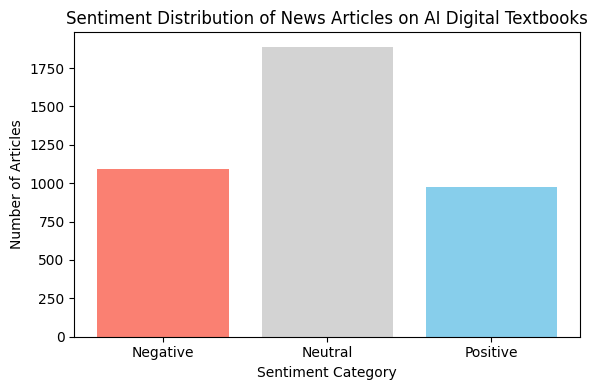

Negative: 1095 articles
Neutral: 1888 articles
Positive: 977 articles


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 데이터 불러오기
df_result = pd.read_csv("/content/drive/MyDrive/Datasets/predicted_news_data.csv")

# 2. 감성 레이블을 영어로 변환
label_map = {'부정': 'Negative', '중립': 'Neutral', '긍정': 'Positive'}
df_result['sentiment_en'] = df_result['sentiment'].map(label_map)

# 3. 감성별 기사 개수 집계 (영문 라벨 기준)
sentiment_order = ['Negative', 'Neutral', 'Positive']
sentiment_counts = df_result['sentiment_en'].value_counts().reindex(sentiment_order, fill_value=0)

# 4. 색상 설정
colors = {
    'Negative': 'salmon',
    'Neutral': 'lightgray',
    'Positive': 'skyblue'
}
bar_colors = [colors.get(label, 'gray') for label in sentiment_counts.index]

# 5. 시각화
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=bar_colors)
plt.title('Sentiment Distribution of News Articles on AI Digital Textbooks')
plt.ylabel('Number of Articles')
plt.xlabel('Sentiment Category')
plt.tight_layout()
plt.show()

#6. 수치 출력
for label, count in zip(sentiment_counts.index, sentiment_counts.values):
    print(f"{label}: {count} articles")

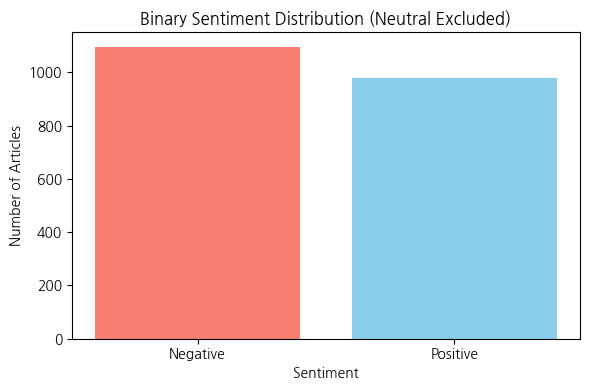

In [ ]:
import matplotlib.pyplot as plt

# 3클래스를 2클래스로 변환 (영문 라벨 사용)
binary_labels = []
for pred in predictions:
    label = pred
    if label == 0:
        binary_labels.append('Negative')
    elif label == 2:
        binary_labels.append('Positive')
    else:
        binary_labels.append(None)  # Neutral 제거

# 결과 적용 및 중립 제거
df_filtered['binary_sentiment_en'] = binary_labels
df_binary = df_filtered.dropna(subset=['binary_sentiment_en'])

# 감성 분포 집계
sentiment_counts = df_binary['binary_sentiment_en'].value_counts().reindex(['Negative', 'Positive'], fill_value=0)

# 색상 설정
colors = {'Negative': 'salmon', 'Positive': 'skyblue'}

# 시각화
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[label] for label in sentiment_counts.index])
plt.title('Binary Sentiment Distribution (Neutral Excluded)')
plt.ylabel('Number of Articles')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()

감성 분석 상위 키워드

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import re

# 형태소 분석기 및 사전 정의
okt = Okt()

# 표준화 사전
normalize_dict = {
    "AI디지털교과서": "AI 디지털 교과서",
    "AI 디지털교과서": "AI 디지털 교과서",
    "AI디지털 교과서": "AI 디지털 교과서",
    "인공지능디지털교과서": "인공지능 디지털 교과서",
    "인공지능 디지털교과서": "인공지능 디지털 교과서",
    "인공지능디지털 교과서": "인공지능 디지털 교과서",
    "디지털교과서": "디지털 교과서"
}

# 불용어 정의
stopwords = set(['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도',
                 '를', '으로', '자', '에', '와', '한', '하다',
                 'AI', '디지털', '교과서', '인공지능'])

# 텍스트 정제 및 명사 추출 함수
def extract_keywords(texts):
    words = []
    for text in texts:
        if pd.isna(text):
            continue
        for key, value in normalize_dict.items():
            text = text.replace(key, value)
        text = re.sub(r'[^가-힣a-zA-Z\s]', '', text)
        tokens = okt.nouns(text)
        filtered = [word for word in tokens if word not in stopwords and len(word) > 1]
        words.extend(filtered)
    return words

# 감성 카테고리별 분석 함수
def analyze_by_sentiment(sentiment_label):
    titles = df_filtered[df_filtered['sentiment'] == sentiment_label]['제목']
    words = extract_keywords(titles)
    counter = Counter(words)
    top_words = counter.most_common(10)
    print(f"\n[{sentiment_label} 기사 제목 상위 단어]")
    for word, count in top_words:
        print(f"{word}: {count}회")
    return top_words

# 실행
top_positive = analyze_by_sentiment('긍정')
top_negative = analyze_by_sentiment('부정')
top_neutral = analyze_by_sentiment('중립')


[긍정 기사 제목 상위 단어]
교육: 221회
도입: 195회
교육청: 139회
에듀: 125회
개발: 95회
학교: 85회
선정: 83회
지원: 80회
교육부: 72회
사업: 72회

[부정 기사 제목 상위 단어]
교육: 284회
도입: 223회
우려: 105회
교육청: 97회
자료: 94회
교사: 84회
이주호: 71회
교육부: 71회
교육감: 64회
학교: 63회

[중립 기사 제목 상위 단어]
교육: 618회
교육청: 274회
도입: 268회
이주호: 167회
학교: 147회
교육부: 141회
에듀: 140회
수업: 135회
교사: 124회
자료: 114회


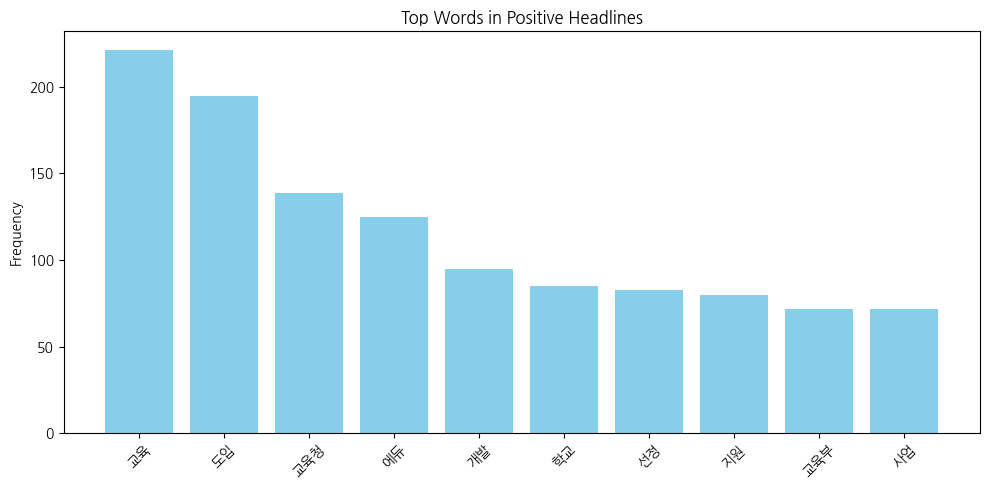

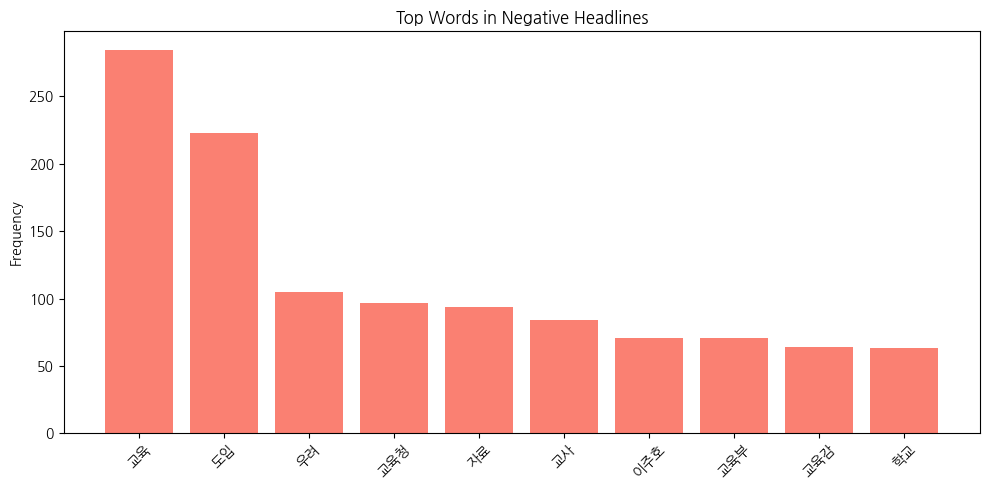

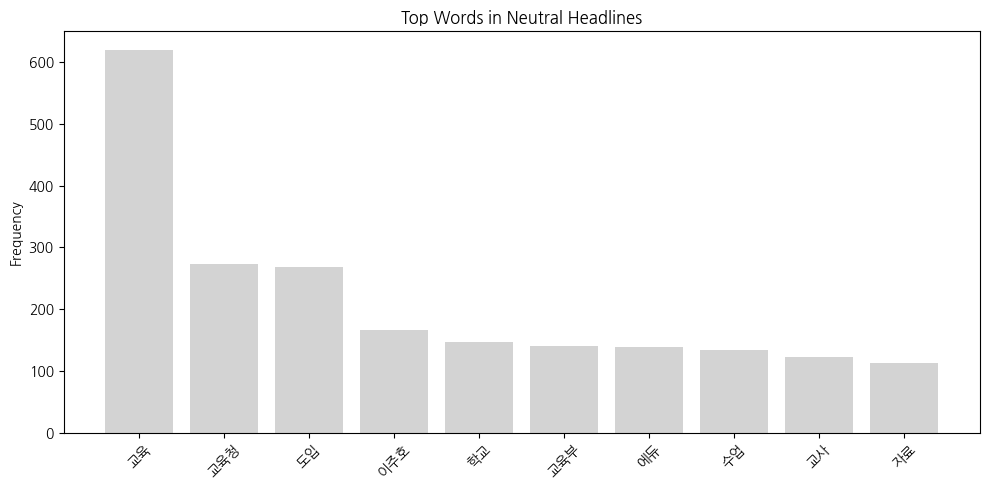

In [ ]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (단어는 여전히 한글일 수 있으므로 폰트 설정 유지)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화 함수 정의 (영문 레이블 적용)
def plot_top_words(top_words, sentiment_label, color):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color=color)

    # 영어 제목으로 표시
    english_titles = {
        '긍정': 'Positive',
        '부정': 'Negative',
        '중립': 'Neutral'
    }
    plt.title(f"Top Words in {english_titles.get(sentiment_label, sentiment_label)} Headlines")
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 시각화 실행
plot_top_words(top_positive, '긍정', 'skyblue')
plot_top_words(top_negative, '부정', 'salmon')
plot_top_words(top_neutral, '중립', 'lightgray')

시기별 감성 분석(긍정/부정/중립)

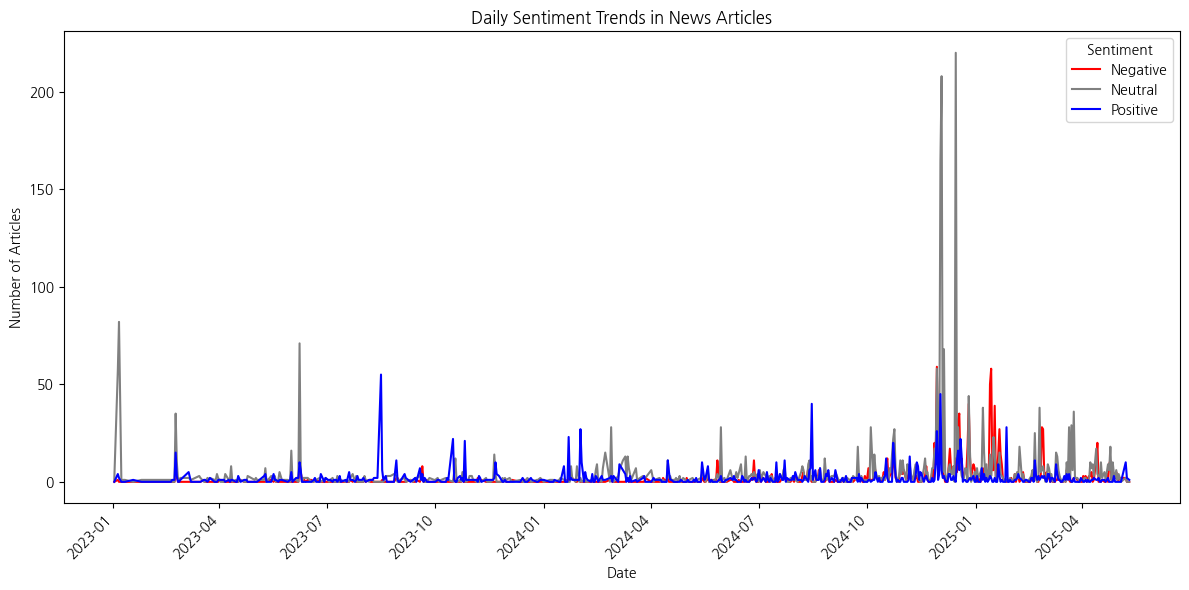

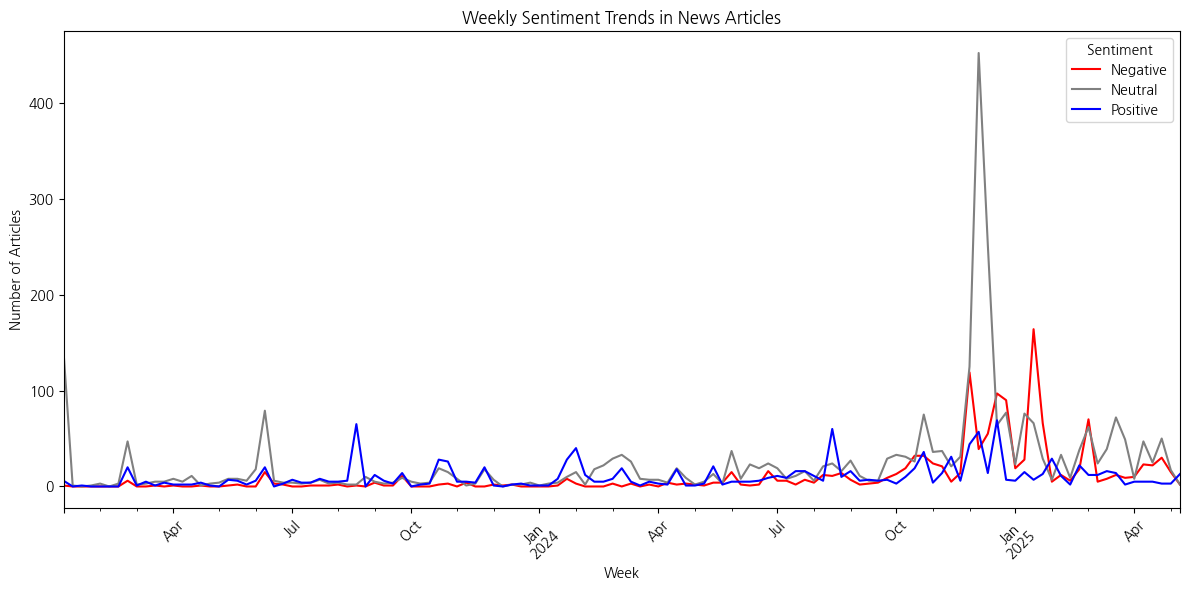

/tmp/ipython-input-55-1834622652.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_grouped = grouped.resample('M').sum()


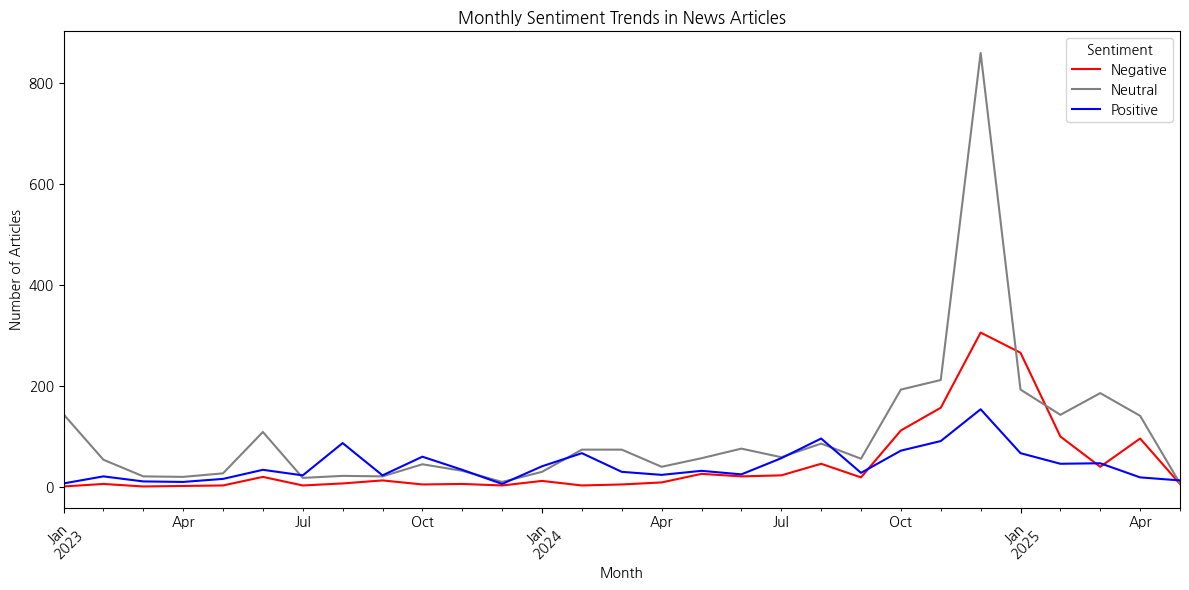

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. df_result에 '일자' 정보 병합 (df_filtered 기준)
# '제목' 기준으로 병합하여 원래 날짜를 복원
df_result = pd.merge(df_result, df_filtered[['제목', '일자']], on='제목', how='left')

# 2. 날짜 형식 변환 및 유효한 날짜만 남기고 인덱스 설정
df_result['date'] = pd.to_datetime(df_result['일자'], errors='coerce')
df_result = df_result.dropna(subset=['date'])
df_result.set_index('date', inplace=True)

# 3. 감정 라벨 영문화
sentiment_map = {'부정': 'Negative', '중립': 'Neutral', '긍정': 'Positive'}
df_result['sentiment_en'] = df_result['sentiment'].map(sentiment_map)

# 4. 일자별 감정 집계
grouped = df_result.groupby([df_result.index, 'sentiment_en']).size().unstack(fill_value=0)

# 5. 컬럼 정렬 (일관된 시각화를 위해)
for col in ['Negative', 'Neutral', 'Positive']:
    if col not in grouped.columns:
        grouped[col] = 0
grouped = grouped[['Negative', 'Neutral', 'Positive']]

# 6. 일별 감성 추이 시각화
grouped.plot(kind='line', color=['red', 'gray', 'blue'], figsize=(12, 6))
plt.title('Daily Sentiment Trends in News Articles')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# 7. 주간 감성 추이
weekly_grouped = grouped.resample('W').sum()
weekly_grouped.plot(kind='line', color=['red', 'gray', 'blue'], figsize=(12, 6))
plt.title('Weekly Sentiment Trends in News Articles')
plt.xlabel('Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# 8. 월간 감성 추이
monthly_grouped = grouped.resample('M').sum()
monthly_grouped.plot(kind='line', color=['red', 'gray', 'blue'], figsize=(12, 6))
plt.title('Monthly Sentiment Trends in News Articles')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

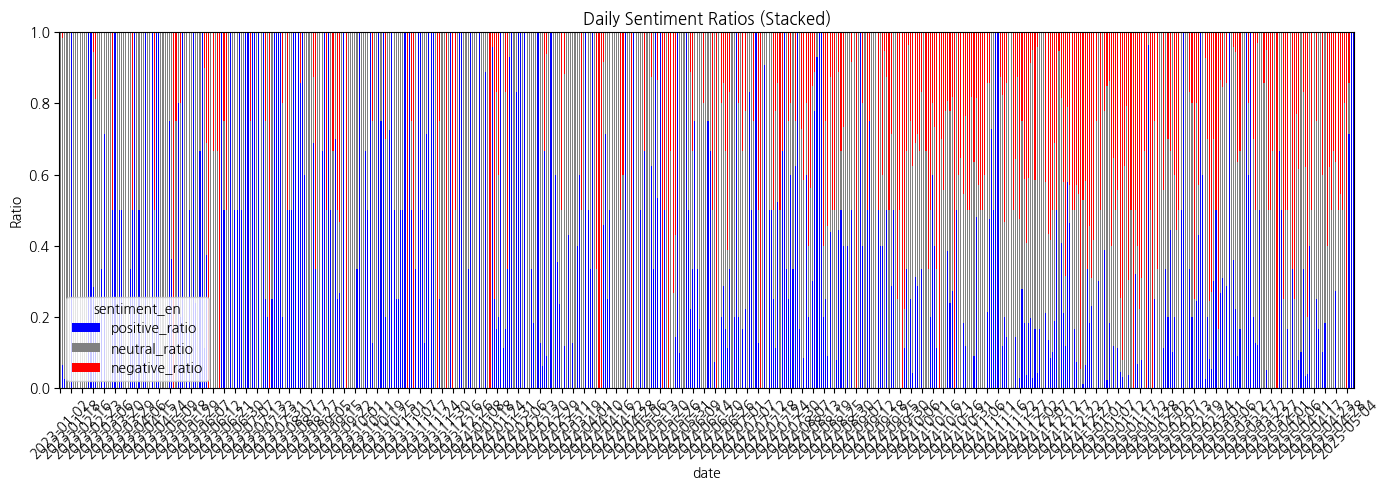

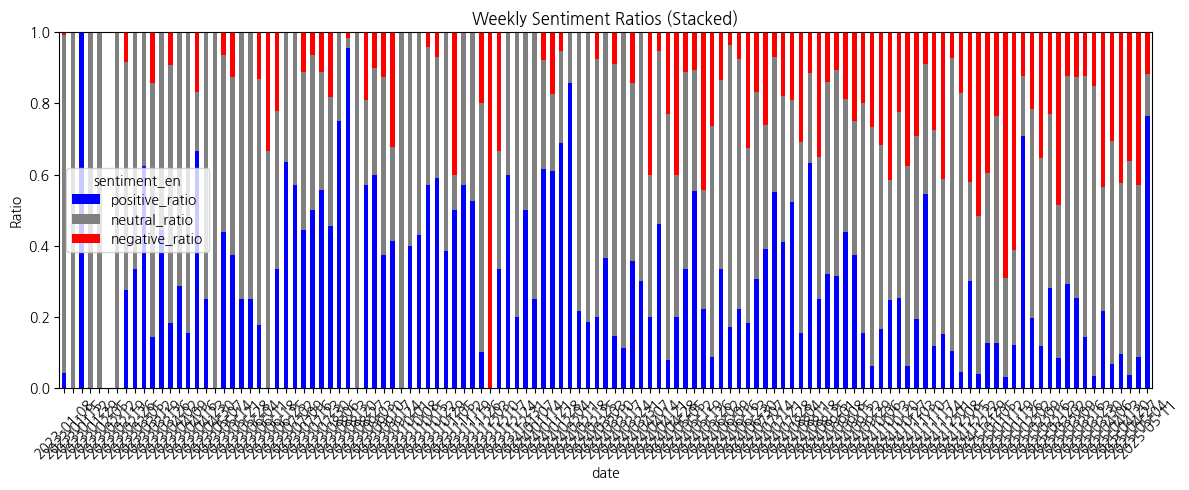

/tmp/ipython-input-56-196586692.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_grouped = grouped.resample('M').sum()


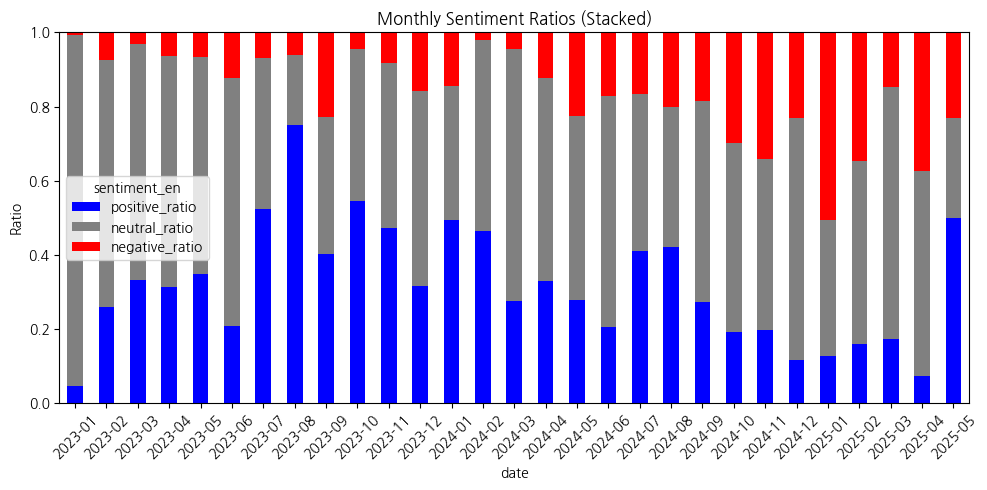

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 인덱스를 datetime으로 변환
grouped.index = pd.to_datetime(grouped.index)

# 원래 컬럼명을 영어로 바꿔 새로운 컬럼 생성
grouped = grouped.rename(columns={
    '긍정': 'Positive',
    '중립': 'Neutral',
    '부정': 'Negative'
})

# 필요한 컬럼 존재 여부 확인
if all(col in grouped.columns for col in ['Positive', 'Negative', 'Neutral']):

    # 1. 감정별 비율 계산
    grouped['total'] = grouped['Positive'] + grouped['Negative'] + grouped['Neutral']
    grouped['positive_ratio'] = grouped['Positive'] / grouped['total']
    grouped['negative_ratio'] = grouped['Negative'] / grouped['total']
    grouped['neutral_ratio'] = grouped['Neutral'] / grouped['total']
    daily_ratio = grouped[['positive_ratio', 'neutral_ratio', 'negative_ratio']]

    # 2. 일별 누적 비율 그래프
    ax1 = daily_ratio.plot(kind='bar', stacked=True, color=['blue', 'gray', 'red'], figsize=(14, 5))
    ax1.set_title('Daily Sentiment Ratios (Stacked)')
    ax1.set_ylabel('Ratio')
    ax1.set_xticks(range(0, len(daily_ratio), 5))
    ax1.set_xticklabels([d.strftime('%Y-%m-%d') for i, d in enumerate(daily_ratio.index) if i % 5 == 0], rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    # 3. 주간 단위 리샘플링 및 시각화
    weekly_grouped = grouped.resample('W').sum()
    weekly_grouped['positive_ratio'] = weekly_grouped['Positive'] / weekly_grouped['total']
    weekly_grouped['negative_ratio'] = weekly_grouped['Negative'] / weekly_grouped['total']
    weekly_grouped['neutral_ratio'] = weekly_grouped['Neutral'] / weekly_grouped['total']
    weekly_ratio = weekly_grouped[['positive_ratio', 'neutral_ratio', 'negative_ratio']]

    ax2 = weekly_ratio.plot(kind='bar', stacked=True, color=['blue', 'gray', 'red'], figsize=(12, 5))
    ax2.set_title('Weekly Sentiment Ratios (Stacked)')
    ax2.set_ylabel('Ratio')
    ax2.set_xticklabels([d.strftime('%Y-%m-%d') for d in weekly_ratio.index], rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    # 4. 월간 단위 리샘플링 및 시각화
    monthly_grouped = grouped.resample('M').sum()
    monthly_grouped['positive_ratio'] = monthly_grouped['Positive'] / monthly_grouped['total']
    monthly_grouped['negative_ratio'] = monthly_grouped['Negative'] / monthly_grouped['total']
    monthly_grouped['neutral_ratio'] = monthly_grouped['Neutral'] / monthly_grouped['total']
    monthly_ratio = monthly_grouped[['positive_ratio', 'neutral_ratio', 'negative_ratio']]

    ax3 = monthly_ratio.plot(kind='bar', stacked=True, color=['blue', 'gray', 'red'], figsize=(10, 5))
    ax3.set_title('Monthly Sentiment Ratios (Stacked)')
    ax3.set_ylabel('Ratio')
    ax3.set_xticklabels([d.strftime('%Y-%m') for d in monthly_ratio.index], rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ Columns 'Positive', 'Neutral', or 'Negative' are missing in grouped. Please verify sentiment analysis results.")

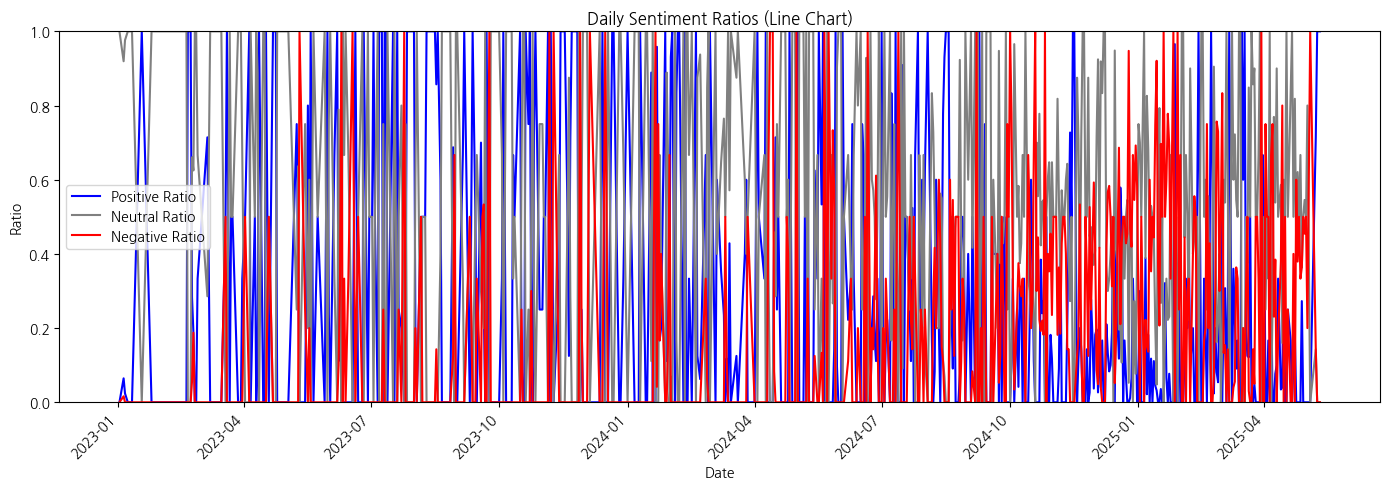

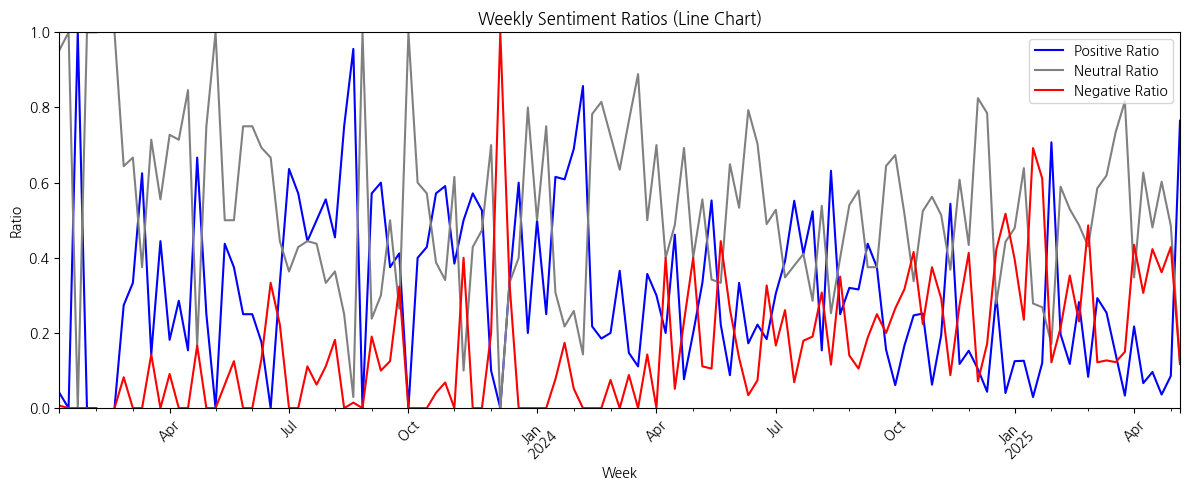

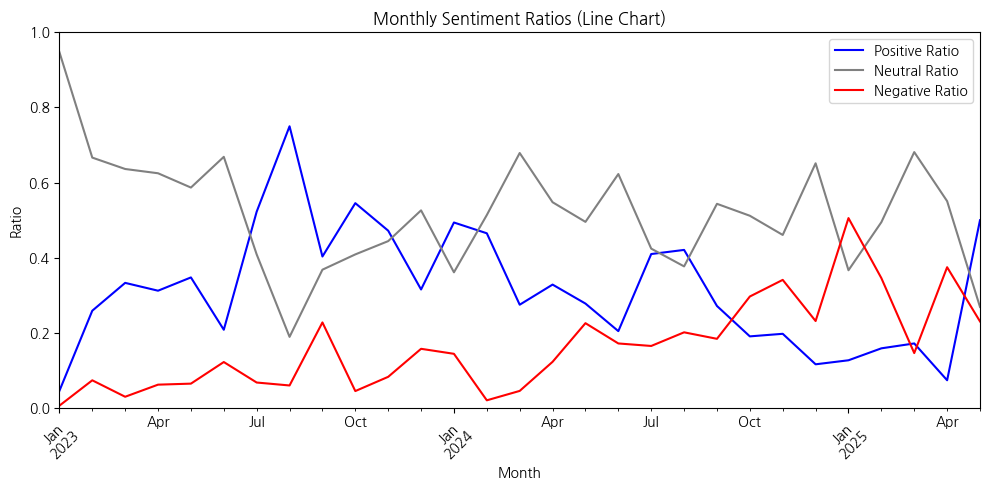

In [ ]:
# Daily sentiment ratio line plot
daily_ratio.plot(kind='line', figsize=(14, 5), color=['blue', 'gray', 'red'])
plt.title('Daily Sentiment Ratios (Line Chart)')
plt.ylabel('Ratio')
plt.xlabel('Date')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(['Positive Ratio', 'Neutral Ratio', 'Negative Ratio'])
plt.tight_layout()
plt.show()

# Weekly sentiment ratio line plot
weekly_ratio.plot(kind='line', figsize=(12, 5), color=['blue', 'gray', 'red'])
plt.title('Weekly Sentiment Ratios (Line Chart)')
plt.ylabel('Ratio')
plt.xlabel('Week')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(['Positive Ratio', 'Neutral Ratio', 'Negative Ratio'])
plt.tight_layout()
plt.show()

# Monthly sentiment ratio line plot
monthly_ratio.plot(kind='line', figsize=(10, 5), color=['blue', 'gray', 'red'])
plt.title('Monthly Sentiment Ratios (Line Chart)')
plt.ylabel('Ratio')
plt.xlabel('Month')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(['Positive Ratio', 'Neutral Ratio', 'Negative Ratio'])
plt.tight_layout()
plt.show()

시기별 감성분석(긍정/부정)

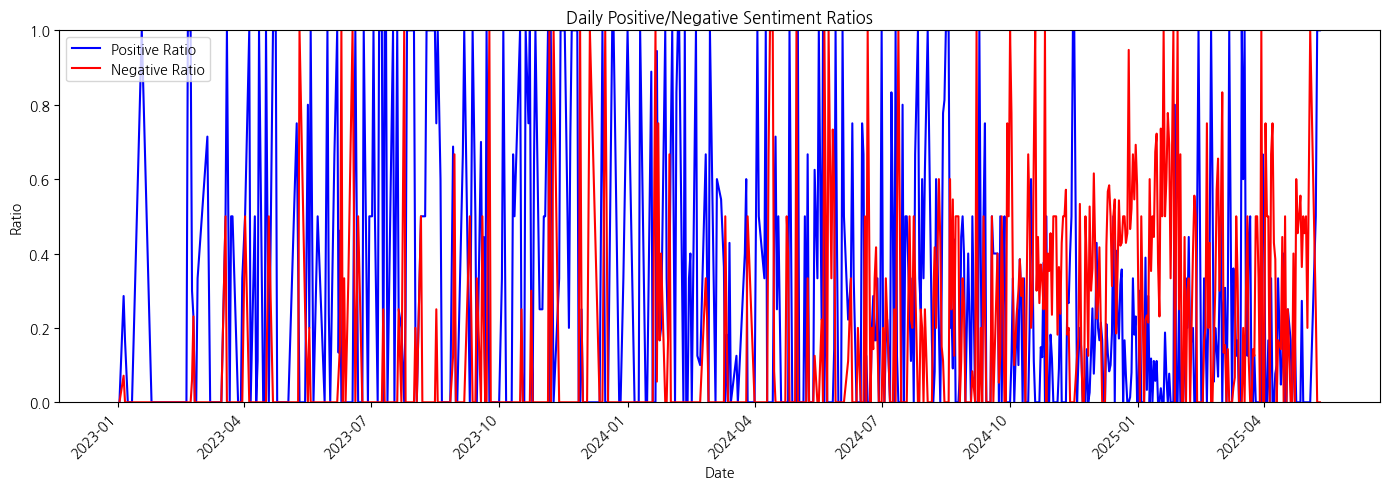

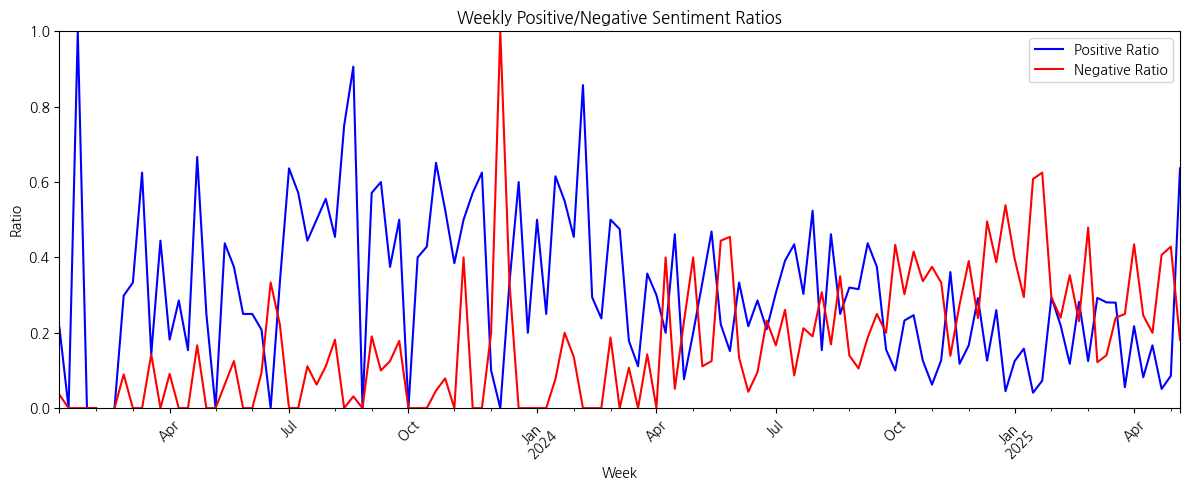

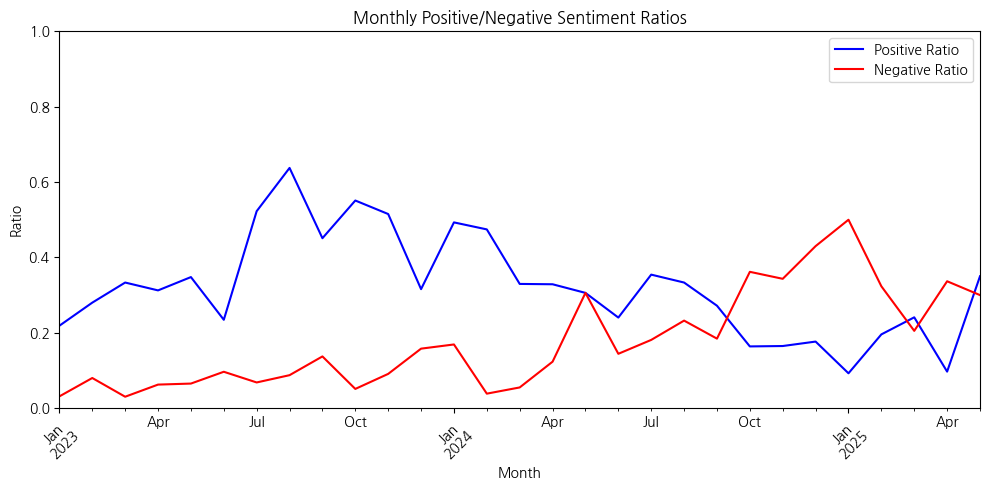

In [ ]:
# Daily Positive/Negative Ratio Line Plot
daily_ratio[['positive_ratio', 'negative_ratio']].plot(kind='line', figsize=(14, 5), color=['blue', 'red'])
plt.title('Daily Positive/Negative Sentiment Ratios')
plt.ylabel('Ratio')
plt.xlabel('Date')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(['Positive Ratio', 'Negative Ratio'])
plt.tight_layout()
plt.show()

# Weekly Positive/Negative Ratio Line Plot
weekly_ratio[['positive_ratio', 'negative_ratio']].plot(kind='line', figsize=(12, 5), color=['blue', 'red'])
plt.title('Weekly Positive/Negative Sentiment Ratios')
plt.ylabel('Ratio')
plt.xlabel('Week')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(['Positive Ratio', 'Negative Ratio'])
plt.tight_layout()
plt.show()

# Monthly Positive/Negative Ratio Line Plot
monthly_ratio[['positive_ratio', 'negative_ratio']].plot(kind='line', figsize=(10, 5), color=['blue', 'red'])
plt.title('Monthly Positive/Negative Sentiment Ratios')
plt.ylabel('Ratio')
plt.xlabel('Month')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(['Positive Ratio', 'Negative Ratio'])
plt.tight_layout()
plt.show()

기간별 감성 분석

/tmp/ipython-input-94-2232001038.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_sentiment_counts = df_result.groupby(['Period', 'Sentiment']).size().unstack(fill_value=0)


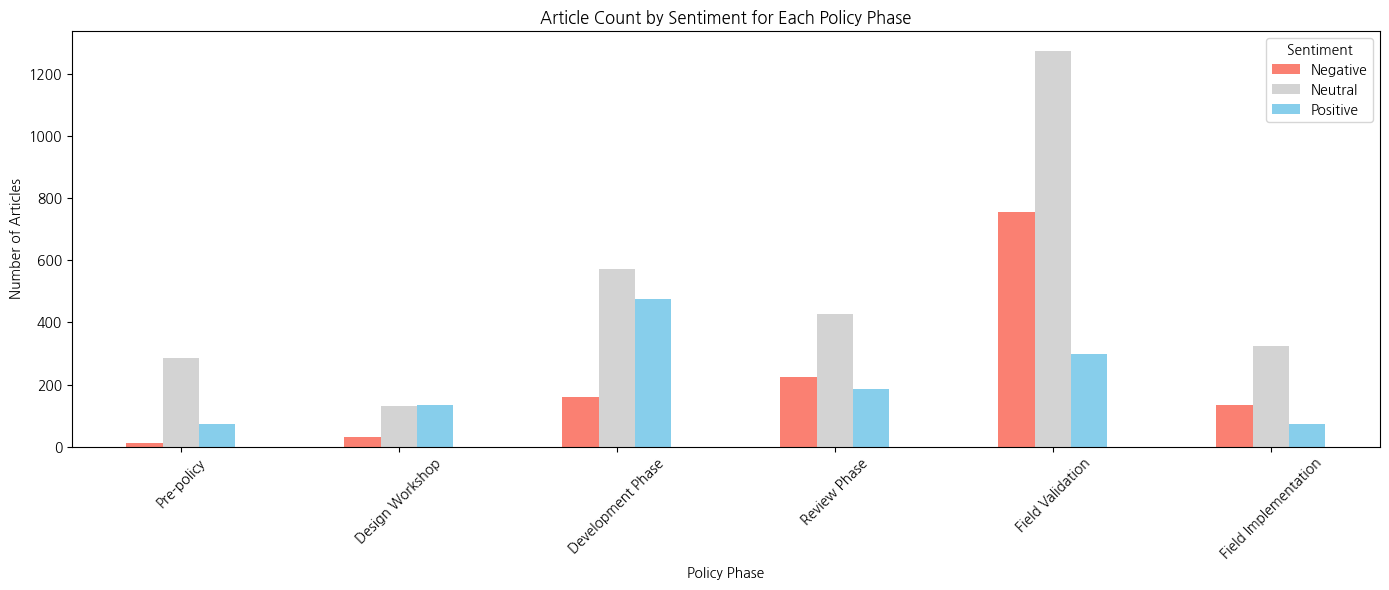

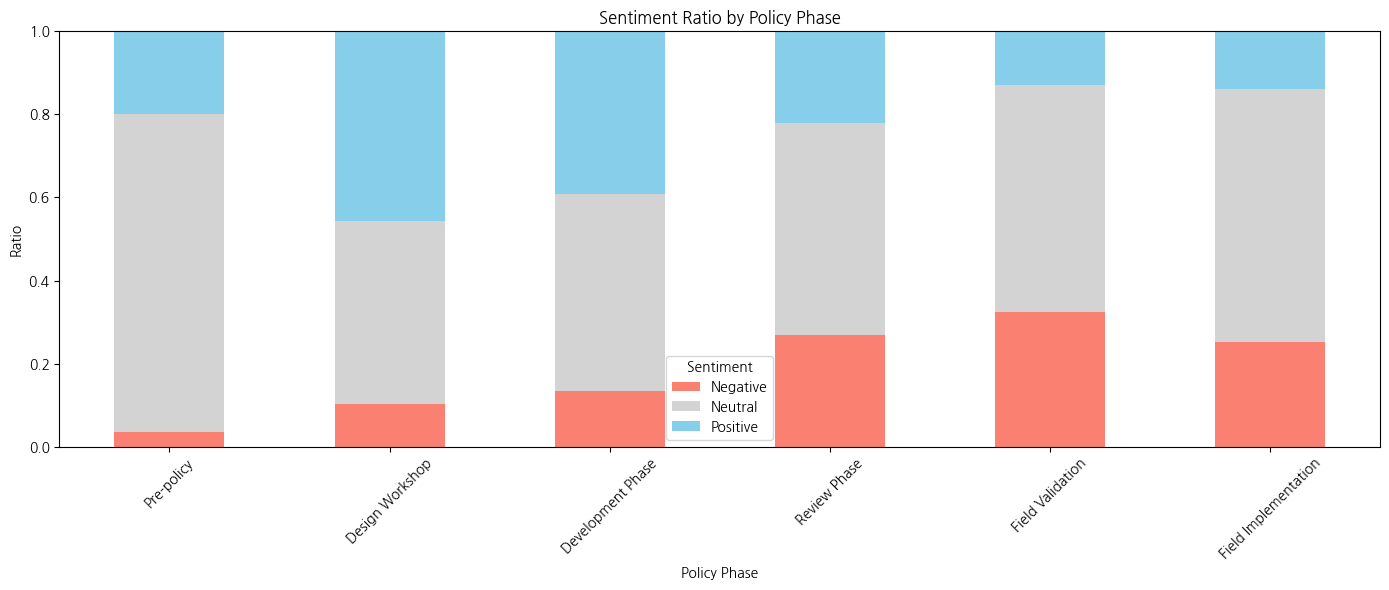

/tmp/ipython-input-94-2232001038.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = subset.groupby('Period')


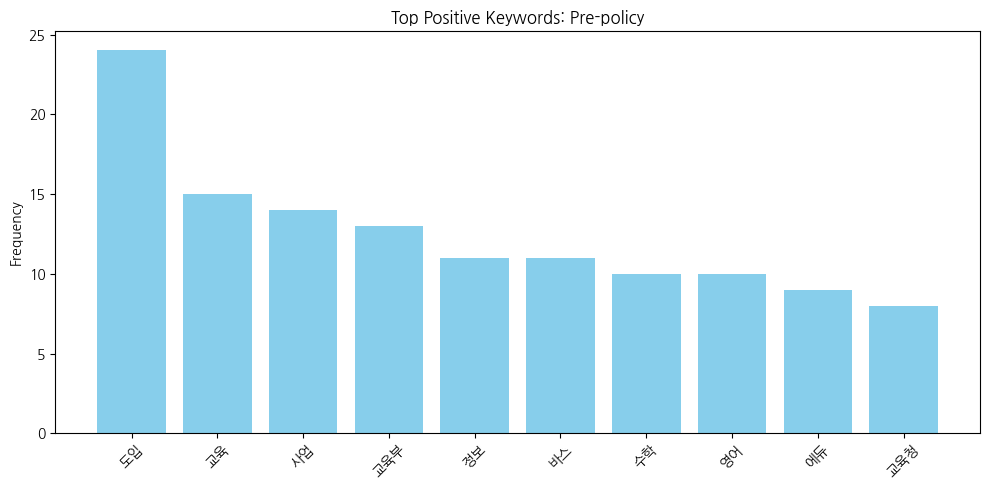

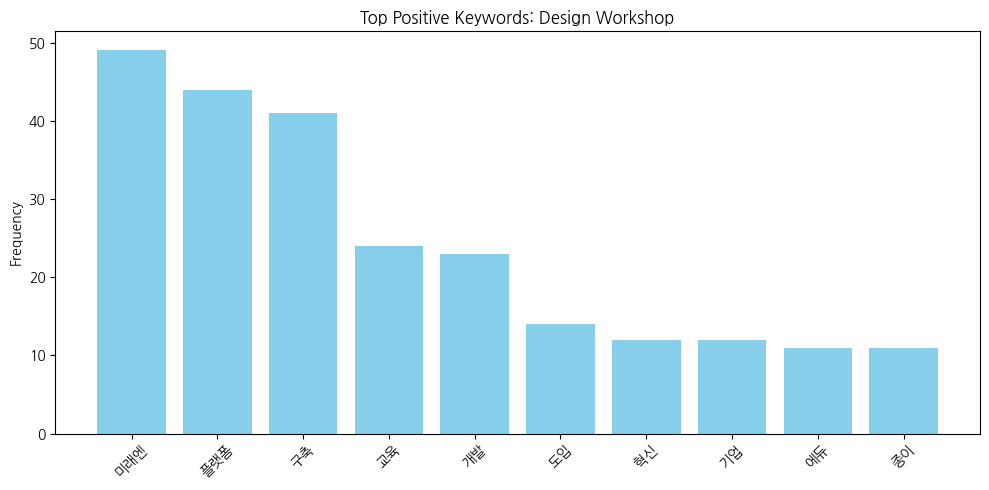

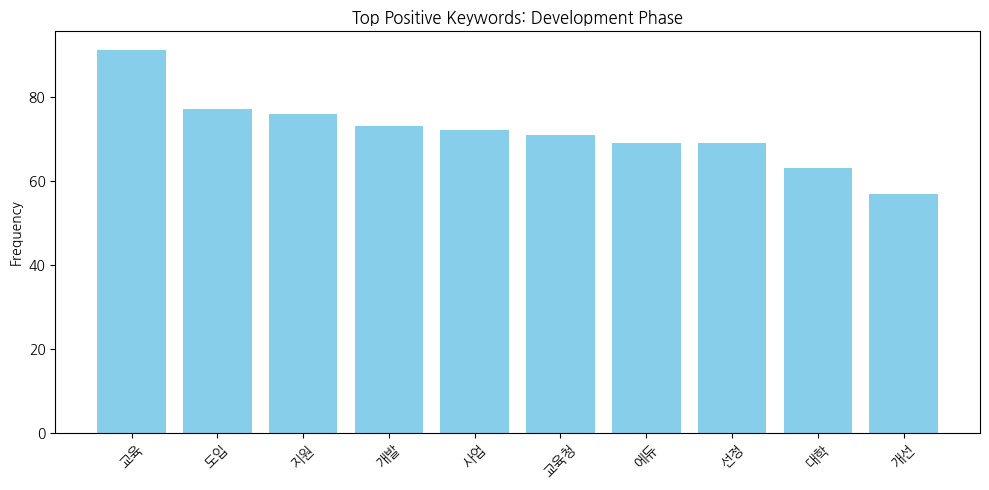

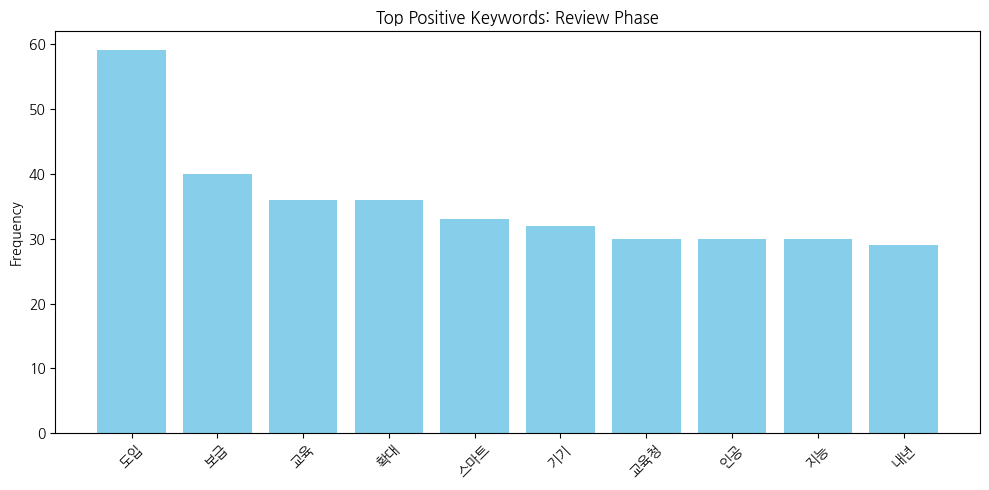

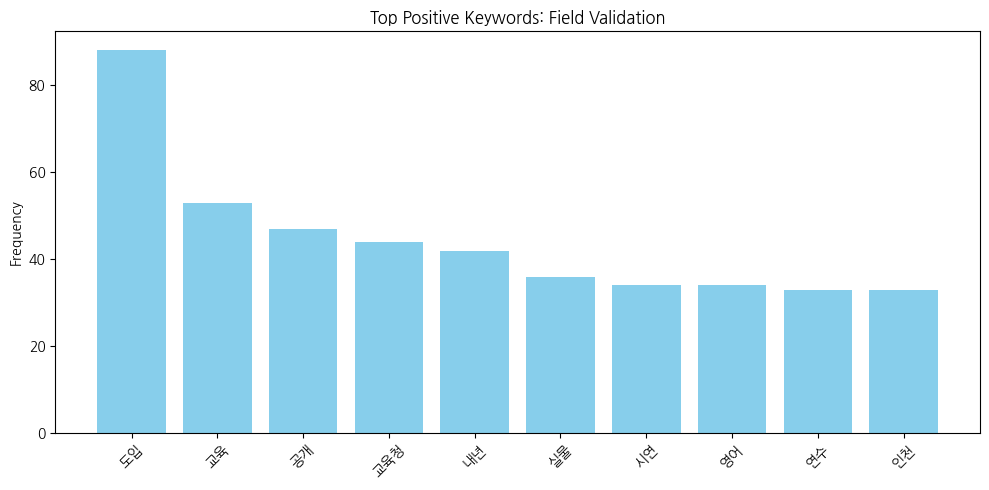

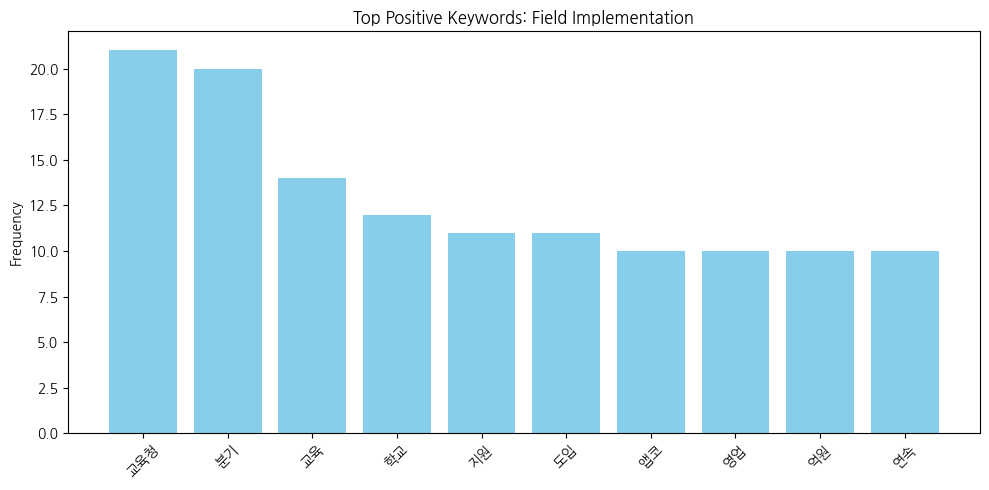

/tmp/ipython-input-94-2232001038.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = subset.groupby('Period')


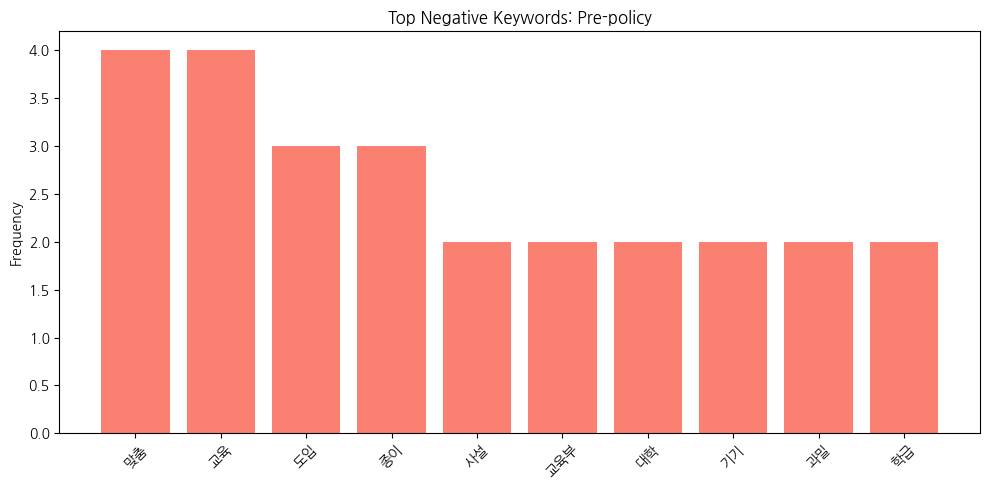

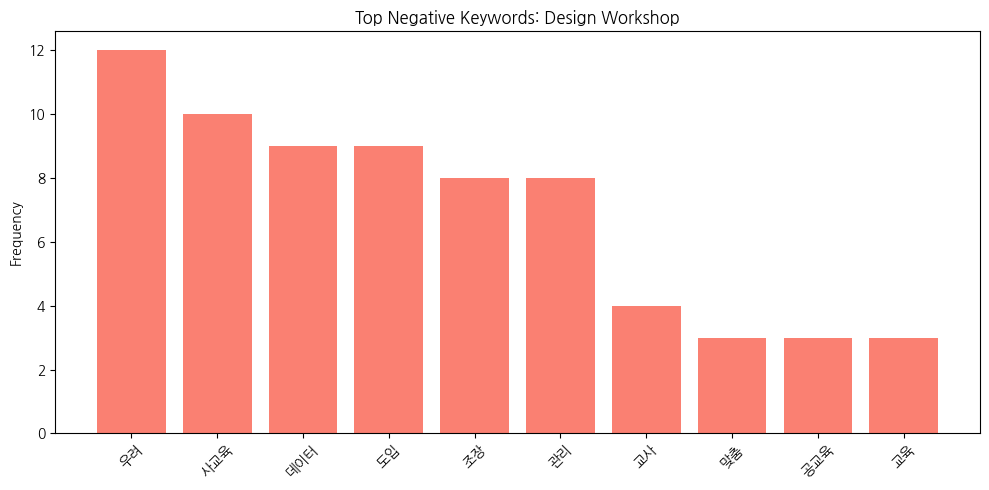

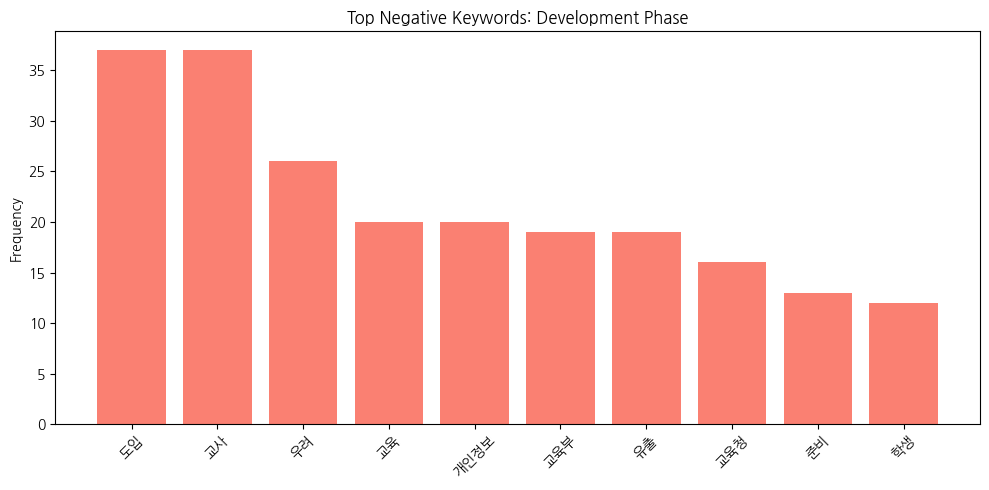

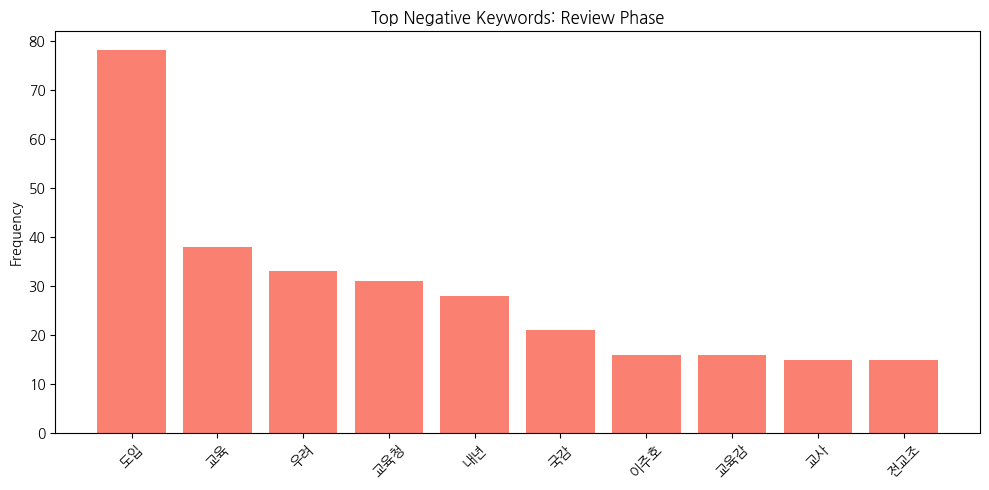

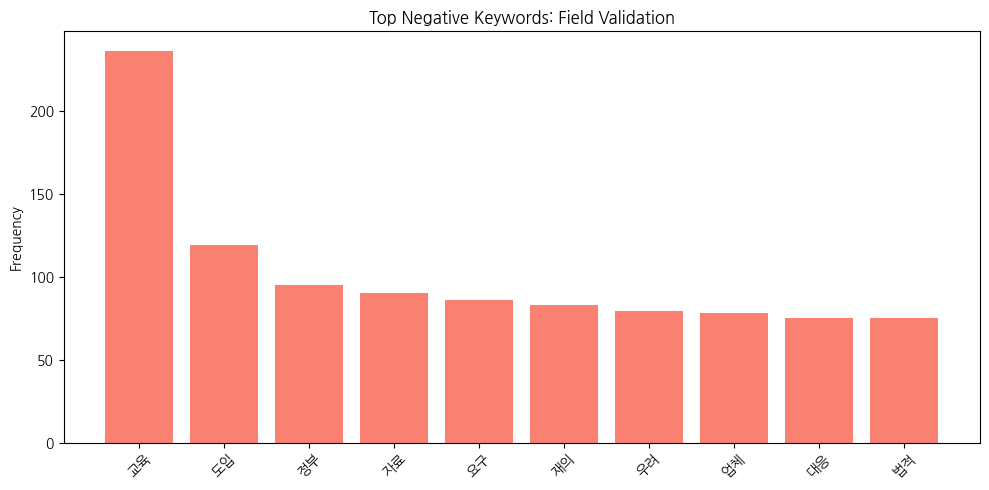

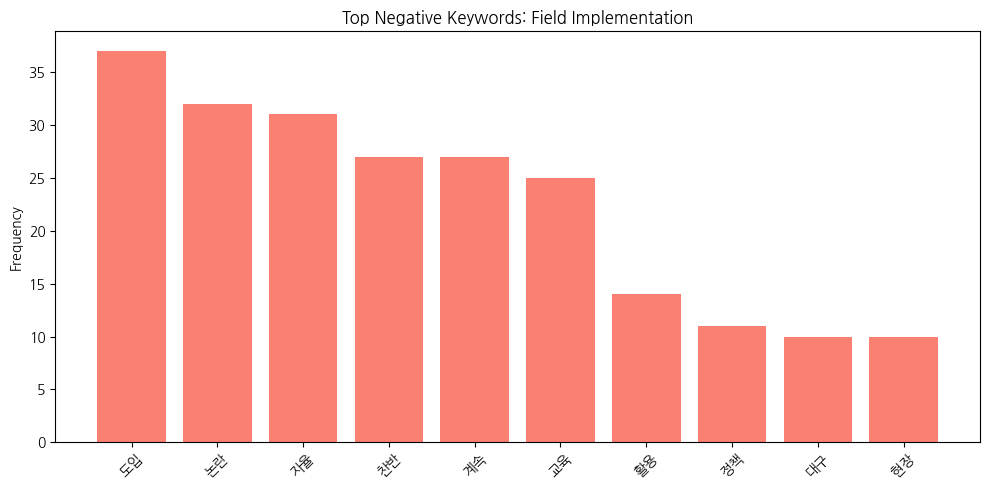

/tmp/ipython-input-94-2232001038.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = subset.groupby('Period')


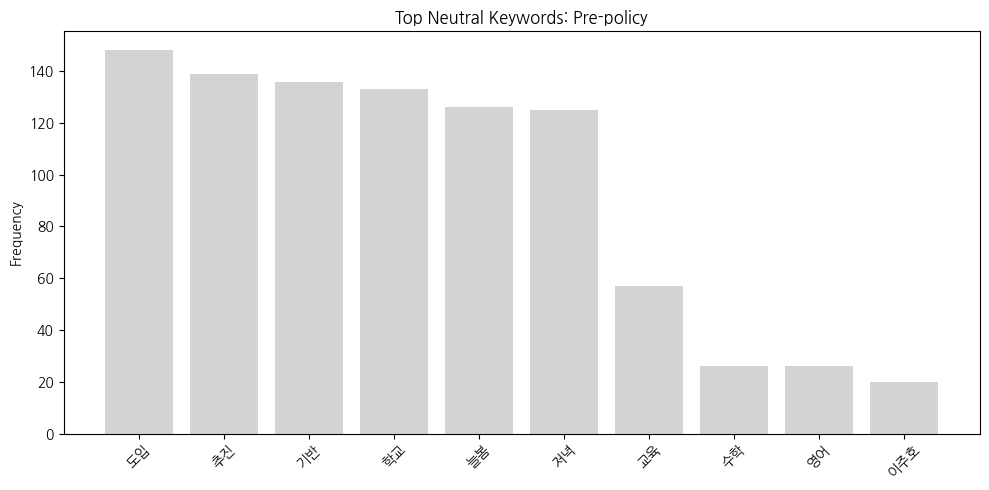

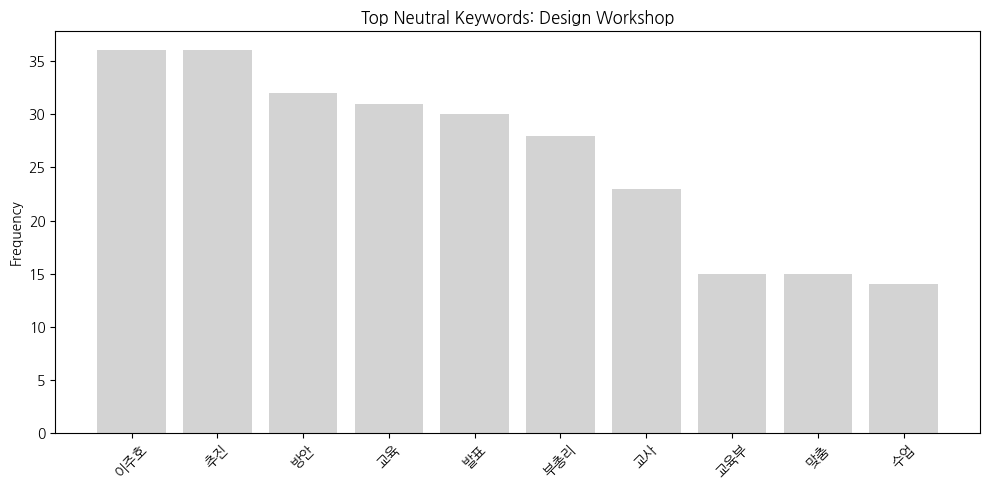

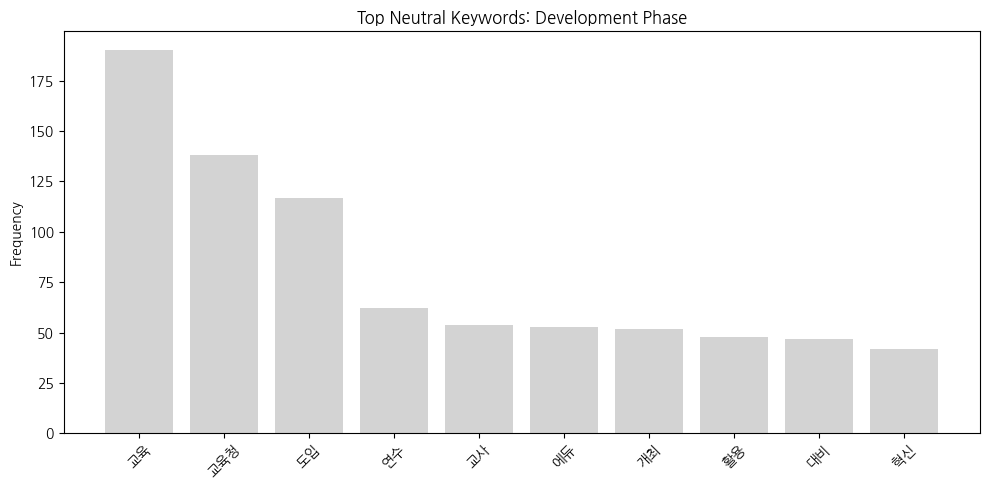

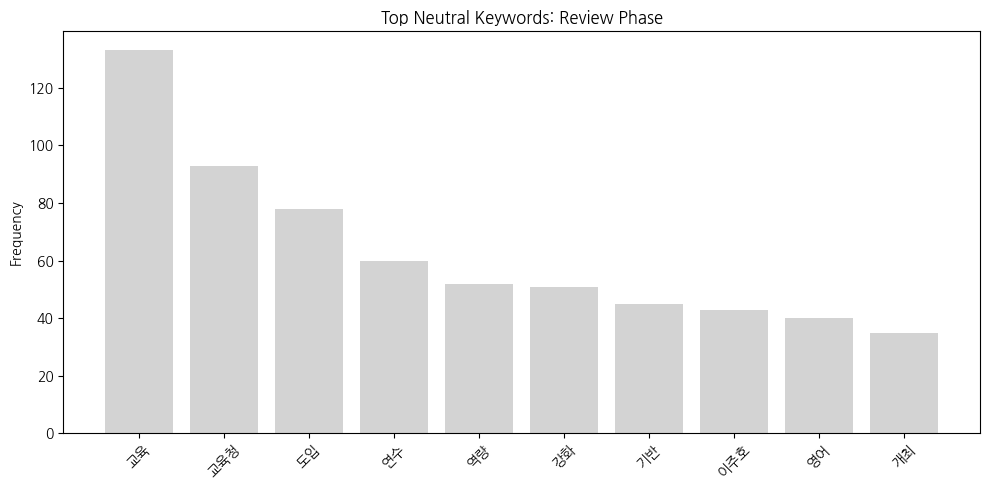

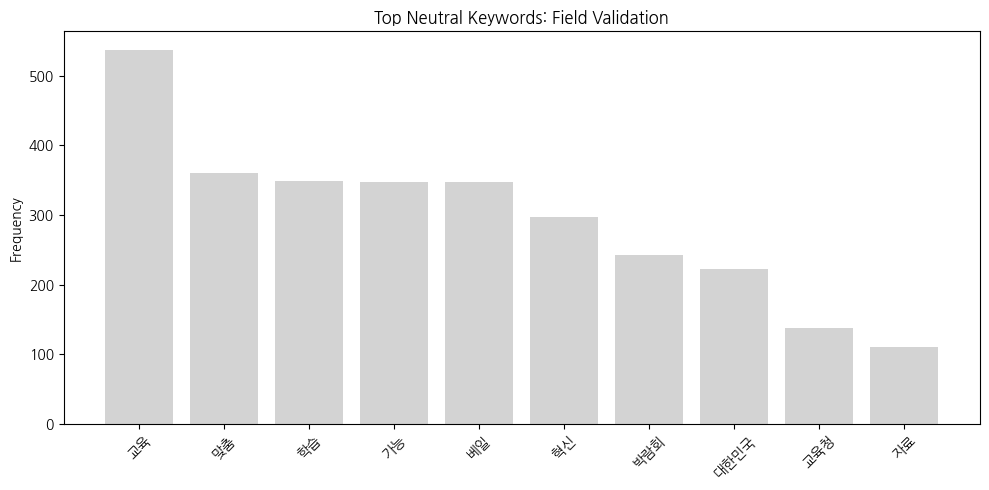

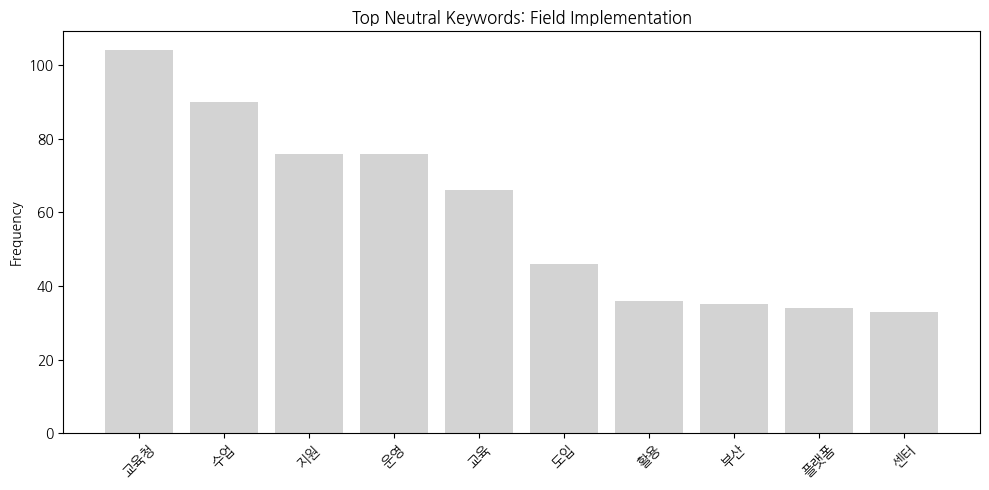

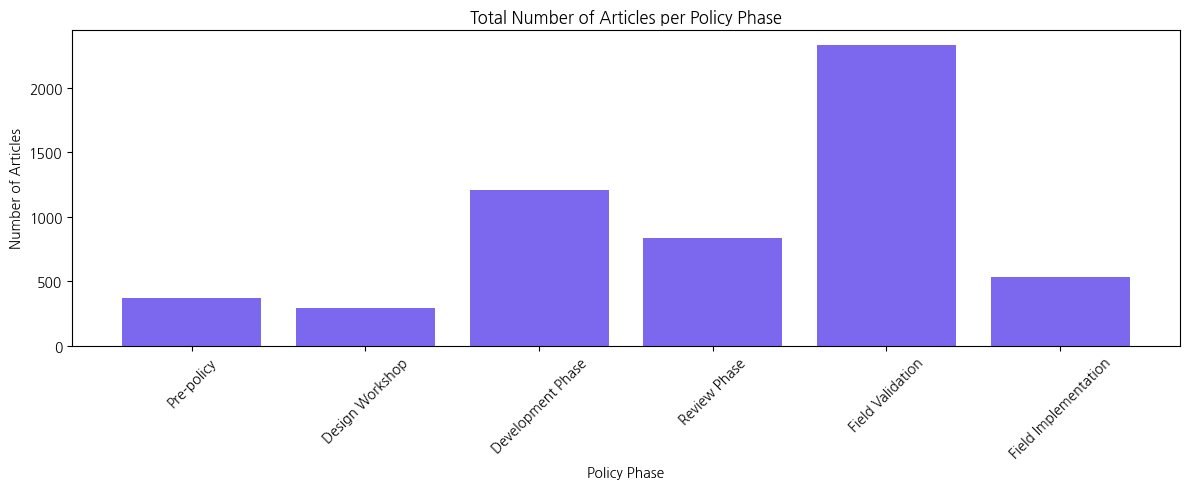

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import re

# 1. 형태소 분석기 및 표준화/불용어 설정
okt = Okt()
normalize_dict = {
    "AI디지털교과서": "AI 디지털 교과서",
    "AI 디지털교과서": "AI 디지털 교과서",
    "AI디지털 교과서": "AI 디지털 교과서",
    "인공지능디지털교과서": "인공지능 디지털 교과서",
    "인공지능 디지털교과서": "인공지능 디지털 교과서",
    "인공지능디지털 교과서": "인공지능 디지털 교과서",
    "디지털교과서": "디지털 교과서"
}
stopwords = set(['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도',
                 '를', '으로', '자', '에', '와', '한', '하다',
                 'AI', '디지털', '교과서', '인공지능'])

# 2. 텍스트에서 키워드 추출 함수
def extract_keywords(text_series):
    words = []
    for text in text_series.dropna():
        for k, v in normalize_dict.items():
            text = text.replace(k, v)
        text = re.sub(r'[^가-힣a-zA-Z\s]', '', text)
        tokens = okt.nouns(text)
        filtered = [t for t in tokens if t not in stopwords and len(t) > 1]
        words.extend(filtered)
    return words

# 3. 감정 영어 레이블 매핑
sentiment_map = {'부정': 'Negative', '중립': 'Neutral', '긍정': 'Positive'}
color_map = {'Negative': 'salmon', 'Neutral': 'lightgray', 'Positive': 'skyblue'}

# 4. 기간 구간 정의 및 분류
periods = [
    ('Pre-policy', '2023-06-08'),
    ('Design Workshop', '2023-08-31'),
    ('Development Phase', '2024-08-22'),
    ('Review Phase', '2024-11-29'),
    ('Field Validation', '2025-03-04'),
    ('Field Implementation', '2025-12-31')
]
period_bins = [pd.Timestamp('2000-01-01')] + [pd.Timestamp(date) for _, date in periods]
period_labels = [label for label, _ in periods]

# 5. 데이터 준비
df_result['일자'] = pd.to_datetime(df_result['일자'], errors='coerce')
df_result = df_result.dropna(subset=['일자'])
df_result['Sentiment'] = df_result['sentiment'].map(sentiment_map)
df_result['Period'] = pd.cut(df_result['일자'], bins=period_bins, labels=period_labels, right=False)

# 6. 각 기간별 감성 기사 수 시각화
period_sentiment_counts = df_result.groupby(['Period', 'Sentiment']).size().unstack(fill_value=0)
period_sentiment_counts = period_sentiment_counts[['Negative', 'Neutral', 'Positive']]  # 컬럼 순서 고정

period_sentiment_counts.plot(kind='bar', figsize=(14, 6), color=[color_map[c] for c in period_sentiment_counts.columns])
plt.title('Article Count by Sentiment for Each Policy Phase')
plt.ylabel('Number of Articles')
plt.xlabel('Policy Phase')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


# 7. 감성 비율 시각화
period_ratio = period_sentiment_counts.div(period_sentiment_counts.sum(axis=1), axis=0)
period_ratio.plot(kind='bar', stacked=True, figsize=(14, 6), color=['salmon', 'lightgray', 'skyblue'])
plt.title('Sentiment Ratio by Policy Phase')
plt.ylabel('Ratio')
plt.xlabel('Policy Phase')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# 8. 각 기간별 감정별 키워드 시각화 함수
def plot_period_keywords(df, sentiment_label, top_n=10):
    subset = df[df['Sentiment'] == sentiment_label].dropna(subset=['Period'])
    grouped = subset.groupby('Period')
    for period, group in grouped:
        words = extract_keywords(group['제목'])
        counter = Counter(words)
        top_words = counter.most_common(top_n)
        if not top_words:
            print(f"⚠️ No keywords for {sentiment_label} in {period}")
            continue
        tokens, counts = zip(*top_words)
        plt.figure(figsize=(10, 5))
        plt.bar(tokens, counts, color=color_map[sentiment_label])
        plt.title(f'Top {sentiment_label} Keywords: {period}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 9. 각 감정별 키워드 그래프 출력
for sentiment in ['Positive', 'Negative', 'Neutral']:
    plot_period_keywords(df_result, sentiment)

# 10. 각 정책 시기별 전체 기사 수 계산
period_total_counts = period_sentiment_counts.sum(axis=1)

# 시각화
plt.figure(figsize=(12, 5))
plt.bar(period_total_counts.index, period_total_counts.values, color='mediumslateblue')
plt.title('Total Number of Articles per Policy Phase')
plt.ylabel('Number of Articles')
plt.xlabel('Policy Phase')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()